In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
train_df = pd.read_csv(r"C:\Users\DELL\Desktop\googlelandmarks\train.csv")

In [5]:
test_df = pd.read_csv(r"C:\Users\DELL\Desktop\googlelandmarks\test.csv")

In [6]:
rank_number = 5 
sampling_rate = 0.002 
random_state = 17 

In [7]:
landmarks=train_df.groupby(by='landmark_id').count().loc[:,'id']
l = landmarks.sort_values(ascending=False)

In [8]:
lmks = pd.concat([l, l/l.sum(), l.cumsum()/l.sum()], axis=1, ignore_index=True)
lmks.columns=['Count', 'Proportion', 'CumSum']
ranked = lmks[0:rank_number]
train_ordered = train_df[train_df.landmark_id.isin(ranked.index)]
sample_gby = train_ordered.groupby(by='landmark_id').apply(lambda x: x.sample(frac=sampling_rate, random_state=random_state))
sample_idx = sample_gby.index.levels[1]
train_sample = train_df.iloc[sample_idx, :]

In [9]:
# write to csv file
train_sample.to_csv('train_sample.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
train_sample_df = pd.read_csv('train_sample.csv')

print("Total training data size:", train_df.shape[0])
print("Total test data size:", test_df.shape[0])
print("Total number of unique landmark_id's:", len(landmarks))

print("Sampled training data size:", train_sample.shape[0])
print("Sampled unique landmark_id's:", len(train_sample["landmark_id"].unique()))

print(train_sample.head())

Total training data size: 1225029
Total test data size: 117703
Total number of unique landmark_id's: 14949
Sampled training data size: 336
Sampled unique landmark_id's: 5
                    id                                                url  \
252   378e26d47fc10897  https://lh3.googleusercontent.com/-L3kzpgPaAeM...   
3095  aa7cee74dae9aa69  https://lh5.googleusercontent.com/-FbWVGTGL_zQ...   
4044  38e49613e953e54f  http://lh4.ggpht.com/-vP0Vb4jHGXA/RwL-Mc6orRI/...   
5089  19c59c1379bbd95e  http://lh4.ggpht.com/-v3QmGPxaXVE/Skjo4FefYfI/...   
5938  b861faf9d6a6a049  https://lh3.googleusercontent.com/-J_hSfUHpAOo...   

     landmark_id  
252         6599  
3095        9633  
4044        6599  
5089        6599  
5938        6051  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import StratifiedShuffleSplit
from itertools import combinations
import random

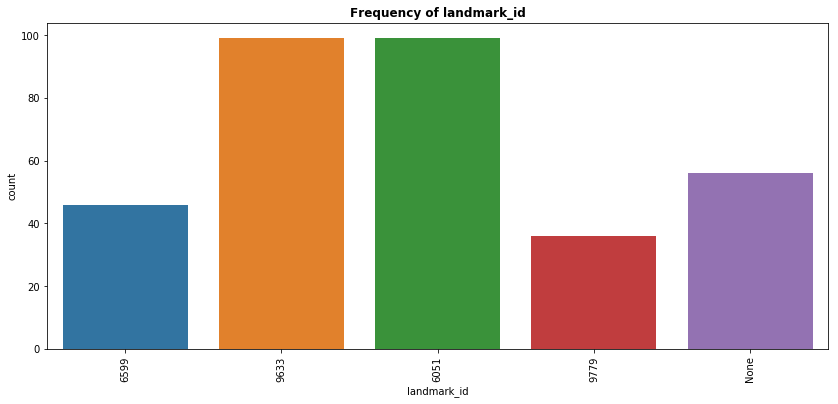

In [11]:
plt.figure(figsize = (14, 6))
g = sns.countplot(x="landmark_id", data=train_sample)
g.set_title("Frequency of landmark_id", fontweight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [12]:
print(train_sample['landmark_id'].value_counts()[:10])

print(train_sample.nunique())

landmark_dist = train_sample['landmark_id'].value_counts() / train_sample.shape[0]
landmark_dist.head()

6051    99
9633    99
None    56
6599    46
9779    36
Name: landmark_id, dtype: int64
id             336
url            281
landmark_id      5
dtype: int64


6051    0.294643
9633    0.294643
None    0.166667
6599    0.136905
9779    0.107143
Name: landmark_id, dtype: float64

In [3]:
pip install opencv-python


  Using cached https://files.pythonhosted.org/packages/a3/50/04d0669afe884f137c2f490642756e8c4a658254300a9eaf253d1e643085/opencv_python-4.1.0.25-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


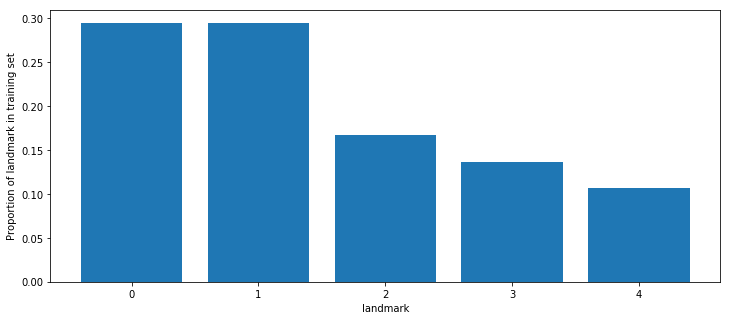

In [13]:
plt.figure(figsize = (12, 5))
fig = plt.bar(range(5), landmark_dist)
plt.xlabel("landmark")
plt.ylabel("Proportion of landmark in training set")
plt.savefig(r'C:\Users\DELL\Desktop\googlelandmarks\Report\class_dist1.png')

['train_images/650c989dd3493748.jpg', 'train_images/675e1bb968bc5150.JPG', 'train_images/6ae1e206c579f649.JPG', 'train_images/97c0a12e07ae8dd5.jpg', 'train_images/tm1.jpg', 'train_images/tm10.jpg', 'train_images/tm11.jpg', 'train_images/tm12.jpg', 'train_images/tm13.jpg', 'train_images/tm14.jpg', 'train_images/tm15.jpg', 'train_images/tm16.jpg', 'train_images/tm17.jpg', 'train_images/tm18.jpg', 'train_images/tm19.jpg', 'train_images/tm2.jpg', 'train_images/tm20.jpg', 'train_images/tm21.jpg', 'train_images/tm22.jpg', 'train_images/tm23.jpg', 'train_images/tm24.jpg', 'train_images/tm25.jpg', 'train_images/tm26.jpg', 'train_images/tm27.jpg', 'train_images/tm28.jpg', 'train_images/tm29.jpg', 'train_images/tm3.jpg', 'train_images/tm30.jpg', 'train_images/tm31.jpg', 'train_images/tm32.jpg', 'train_images/tm33.jpg', 'train_images/tm34.jpg', 'train_images/tm35.jpg', 'train_images/tm36.jpg', 'train_images/tm37.jpg', 'train_images/tm38.jpg', 'train_images/tm39.jpg', 'train_images/tm4.jpg', 'trai

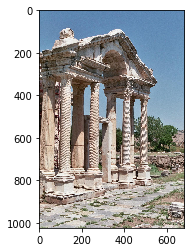

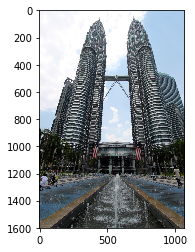

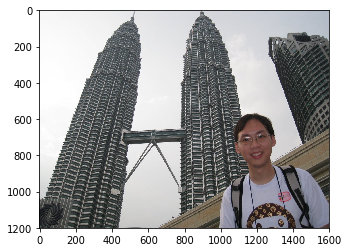

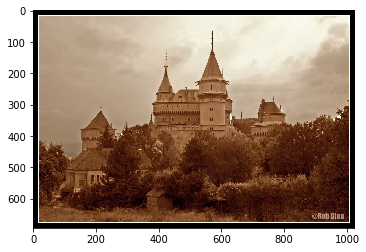

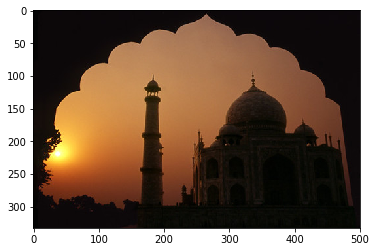

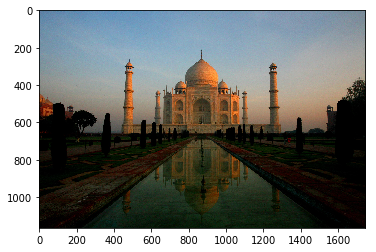

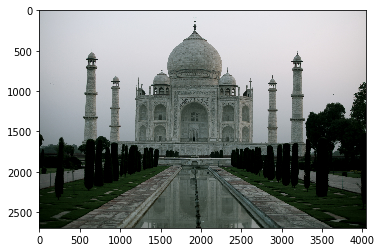

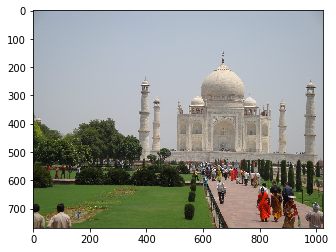

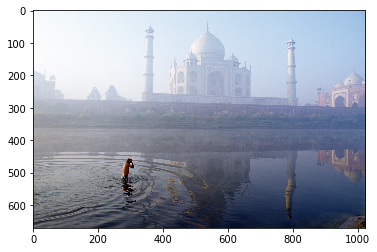

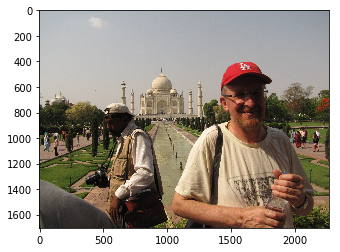

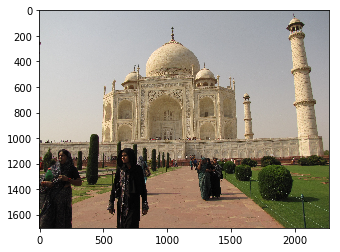

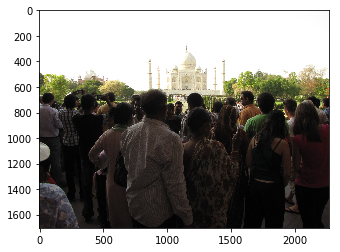

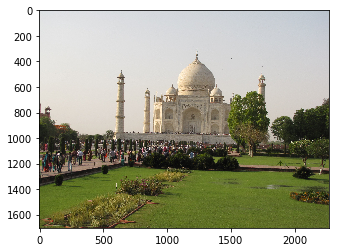

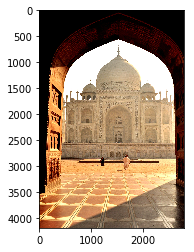

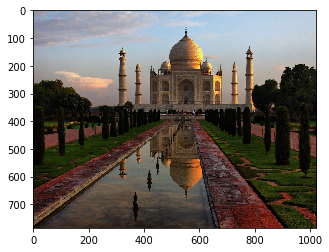

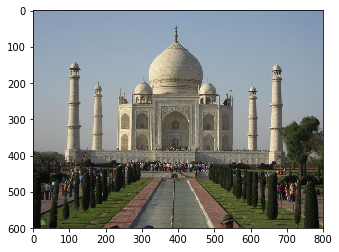

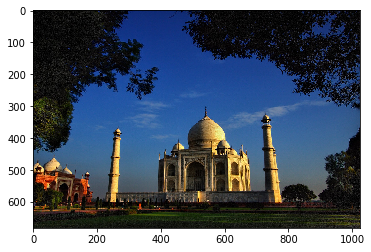

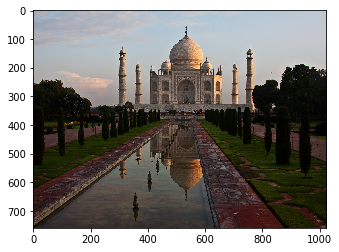

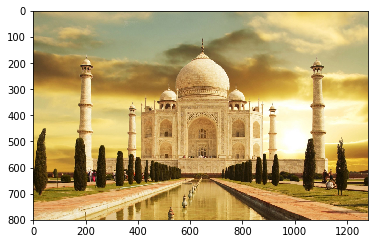

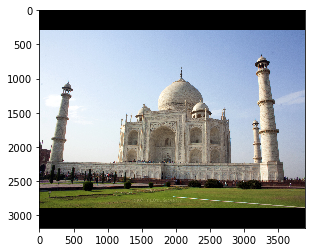

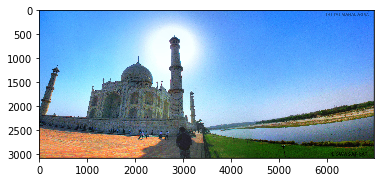

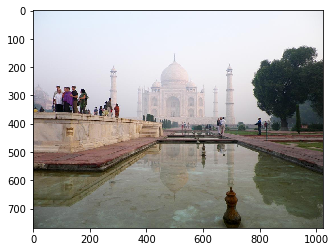

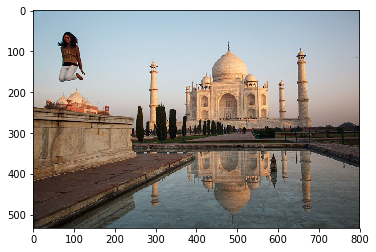

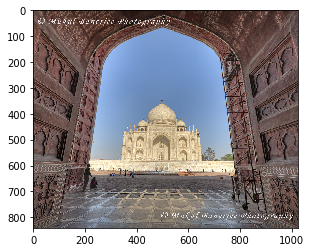

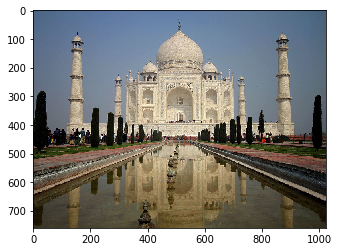

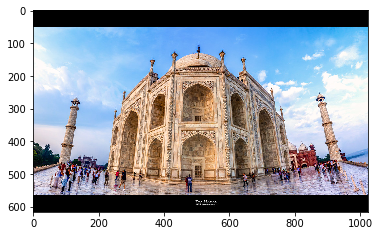

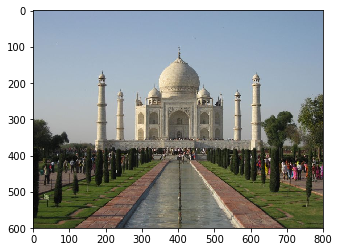

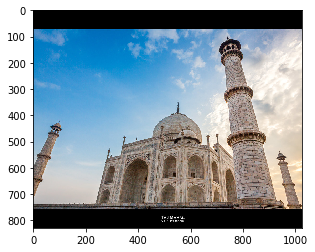

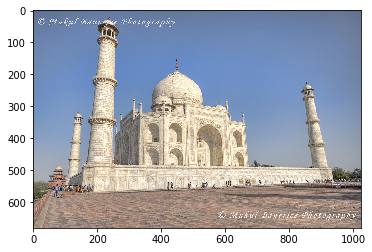

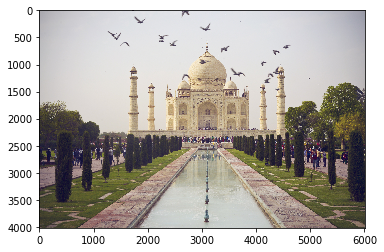

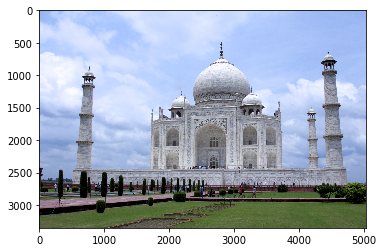

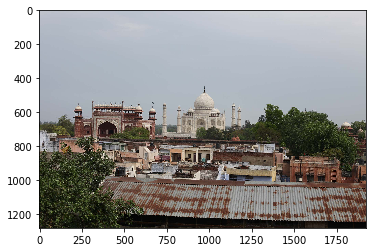

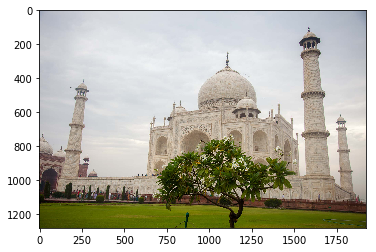

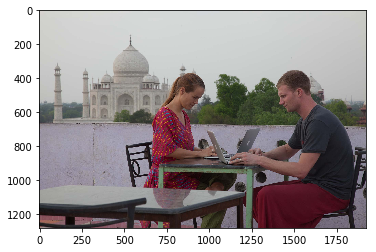

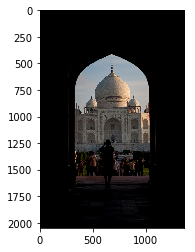

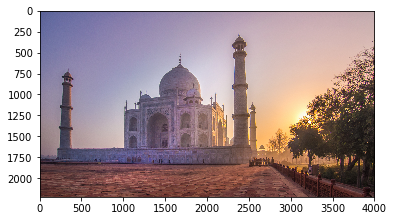

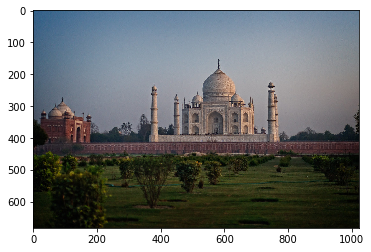

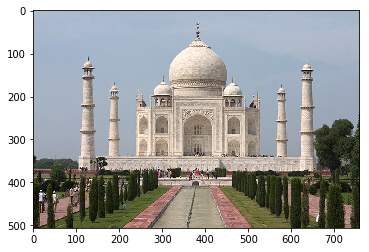

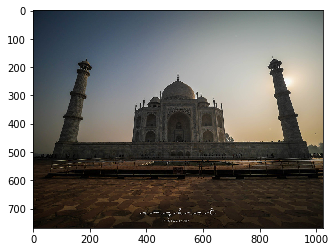

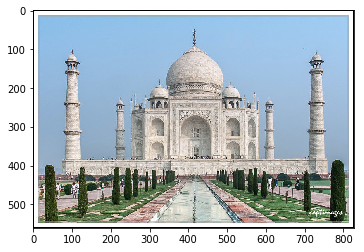

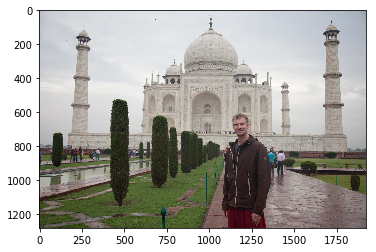

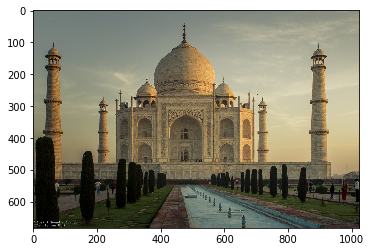

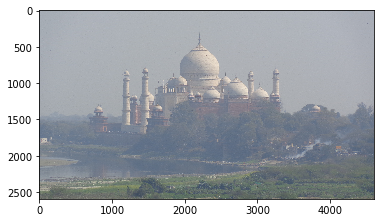

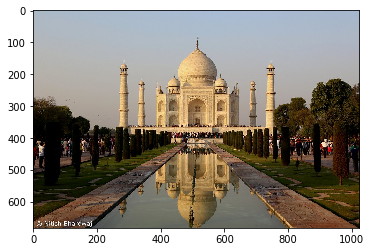

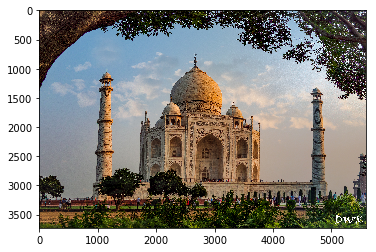

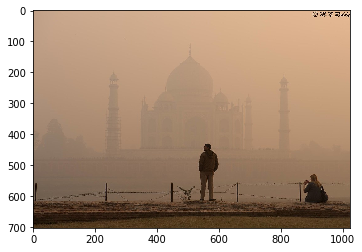

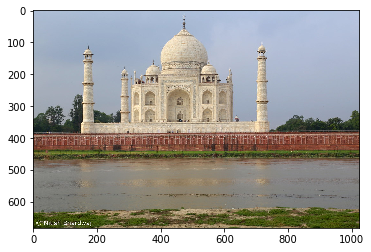

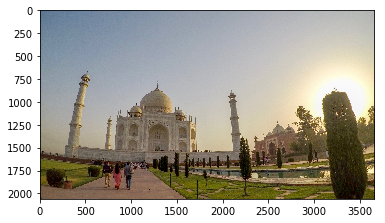

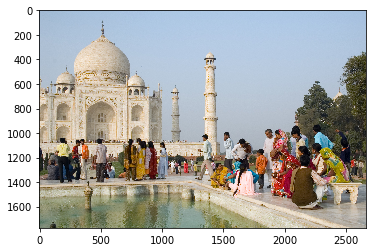

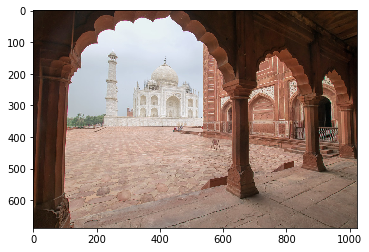

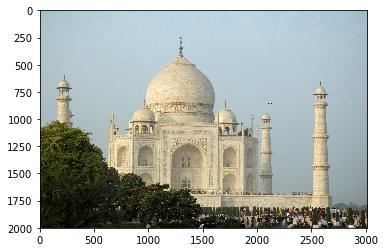

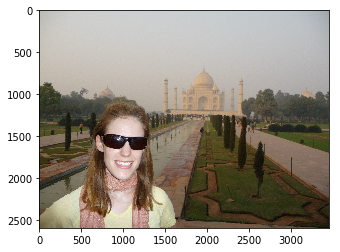

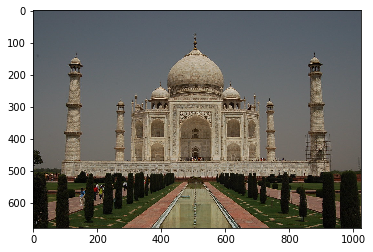

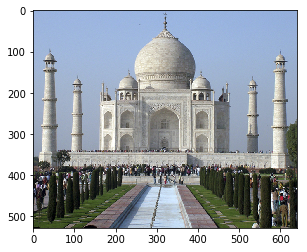

In [130]:
train_dir = 'train_images'
train_imgs = ['train_images/{}'.format(i) for i in os.listdir(train_dir)]
del train_imgs[0]
print(train_imgs)

for ima in train_imgs:
    img1 = cv2.imread(ima)
    cv_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

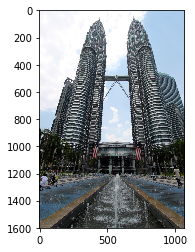

In [122]:
img2 = cv2.imread(r'train_images/675e1bb968bc5150.JPG')
cv_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

In [134]:
nrows = 150
ncolumns = 150
channels = 1

def read_and_process_image(list_of_images):
    x = []
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
    return x

x = read_and_process_image(train_imgs)
print(x)

[array([[[182, 142, 100],
        [180, 140,  98],
        [183, 144, 100],
        ...,
        [183, 140,  97],
        [182, 139,  96],
        [180, 138,  91]],

       [[183, 143, 101],
        [180, 140,  98],
        [183, 144, 100],
        ...,
        [183, 138,  95],
        [186, 140,  99],
        [181, 138,  95]],

       [[181, 142,  98],
        [180, 141,  97],
        [179, 139,  97],
        ...,
        [181, 139,  92],
        [181, 138,  99],
        [183, 140,  98]],

       ...,

       [[185, 189, 190],
        [194, 198, 199],
        [169, 173, 173],
        ...,
        [213, 225, 226],
        [177, 198, 189],
        [ 99, 121, 117]],

       [[192, 196, 197],
        [173, 177, 178],
        [184, 190, 189],
        ...,
        [ 57,  79,  75],
        [ 86, 111, 105],
        [ 73, 101,  97]],

       [[156, 178, 180],
        [173, 189, 188],
        [132, 162, 156],
        ...,
        [152, 174, 179],
        [136, 148, 164],
        [145, 167, 173]

        [  4,  11,   9]]], dtype=uint8)]


IndexError: list index out of range

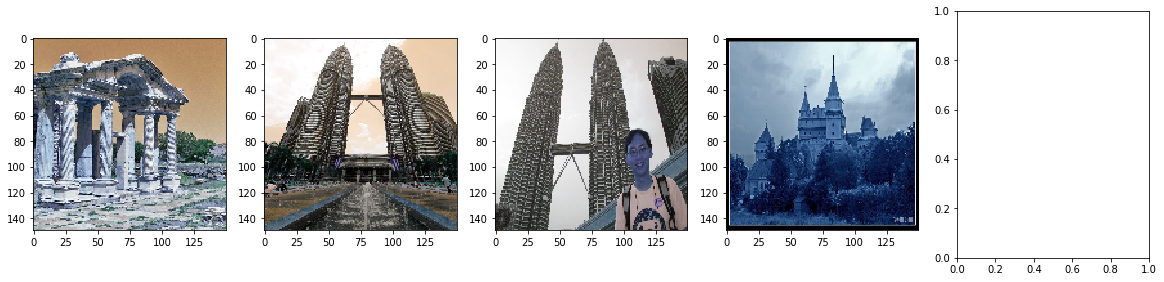

In [133]:
plt.figure(figsize = (20,10))
columns = len(train_imgs) - 1 
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(x[i])

In [16]:
X = train_sample_df['id']
y = train_sample_df['landmark_id']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

for train_id, test_id in sss.split(X, y):
    X_train, X_tmp = X.iloc[train_id], X.iloc[test_id]
    y_train, y_tmp = y.iloc[train_id], y.iloc[test_id]

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)

for train_id, test_id in sss1.split(X_tmp, y_tmp):
    X_valid, X_test = X_tmp.iloc[train_id], X_tmp.iloc[test_id]
    y_valid, y_test = y_tmp.iloc[train_id], y_tmp.iloc[test_id]

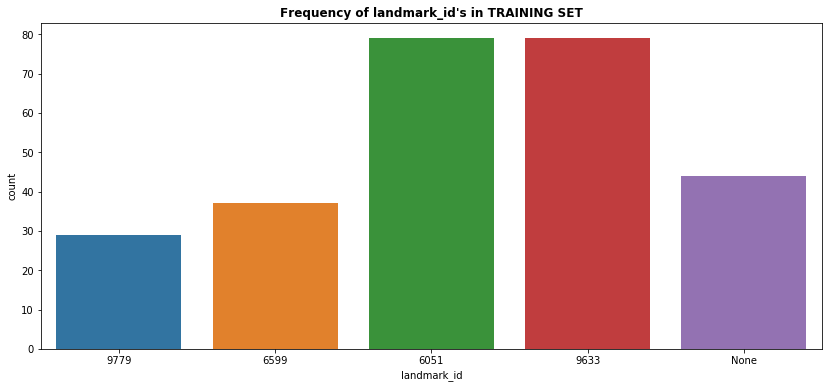

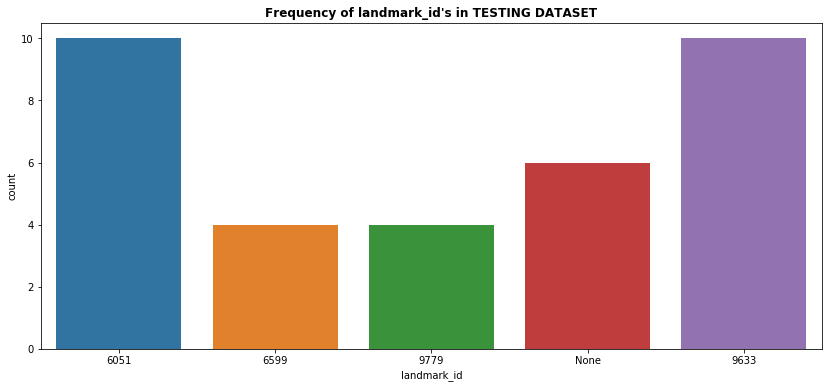

In [22]:
plt.figure(figsize = (14, 6))
h = sns.countplot(x=y_train)
h.set_title("Frequency of landmark_id's in TRAINING SET", fontweight="bold", fontsize=12)
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize = (14, 6))
h = sns.countplot(x=y_test)
h.set_title("Frequency of landmark_id's in TESTING DATASET", fontweight="bold", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [23]:
def expected_acc(prob_id):
    
    prob_id_c = 1 - prob_id
    prob_correct_number = []

    for i in range(len(prob_id)+1):

        id_comb = list(combinations(range(len(prob_id)), r=i))
        id_notcomb = [tuple(set(range(len(prob_id)))^set(x)) for x in id_comb]

        prob_comb = np.array([[prob_id[x] for x in id_comb[i]] for i in range(len(id_comb))])
        prob_notcomb = np.array([[prob_id_c[x] for x in id_notcomb[i]] for i in range(len(id_notcomb))])

        prob_num = np.hstack((prob_comb, prob_notcomb))
        ss = sum([np.prod(x) for x in prob_num])

        prob_correct_number.append(ss)

    expected_correct_num = sum(np.array(range(len(prob_id)+1)) * np.array(prob_correct_number))
    expected_accuracy = expected_correct_num / len(prob_id)
    
    return([expected_correct_num, expected_accuracy])

In [24]:
prob_id = np.array([(y_test == id).sum() / len(y_test) for id in y_test]) # Calculates probabilities of all landmark_id
seed = [3, 10, 27, 31, 48, 55, 67, 95, 105, 117]

expected_val_df = pd.DataFrame(columns=['E(x)', 'Accuracy'])

for i in seed:
    
    random.seed(i)
    randsample = random.sample(range(len(y_test)), 20)
    
    prob_id_montecarlo = prob_id[randsample]  # random selection of 20 images (instead of total test dataset)
    expected_val_df.loc[len(expected_val_df)] = expected_acc(prob_id_montecarlo)



print(expected_val_df)

round(expected_val_df.T,3)

print(expected_val_df.mean())

       E(x)  Accuracy
0  4.823529  0.241176
1  5.000000  0.250000
2  4.352941  0.217647
3  4.647059  0.232353
4  4.529412  0.226471
5  4.352941  0.217647
6  4.294118  0.214706
7  4.882353  0.244118
8  4.529412  0.226471
9  4.529412  0.226471
E(x)        4.594118
Accuracy    0.229706
dtype: float64


In [25]:
import sys, requests, shutil, os
from urllib import request, error
import sys

In [33]:
import os
from keras.preprocessing import image                  
from tqdm import tqdm

img_shape = (192, 256) # Image shape (height, width)

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=img_shape)
    
    # convert PIL.Image.Image type to 3D tensor with shape (192, 256, 3)
    x = image.img_to_array(img)
    
    # convert 3D tensor to 4D tensor with shape (1, 192, 256, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [34]:
import urllib
import base64
import gzip
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

In [28]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install tensorflow

  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
Note: you may need to restart the kernel to use updated packages.


In [97]:
from glob import glob
import os

# define function to load train, test, and validation datasets

def load_dataset(path, train_sample):
    print(path)
    file_out =(path + '*')
    print(file_out)
    #file_out = np.array([s.replace("\\", "/") for s in file_out])
    file_out = np.array()
    print(file_out)
    label_out = pd.Series(name="landmark_id")
    
    for file in file_out:
        filebase = os.path.basename(file)
        #print(filebase)
        name = os.path.splitext(filebase)[0]
        temp = train_sample.landmark_id[train_sample["id"] == name]
        print(temp)
        label_out = label_out.append(temp)
        
    label_out = np.array(pd.get_dummies(label_out))
    print(label_out)
    
    return file_out, label_out

In [98]:
train_path = 'train_images/'
valid_path = './valid_images/'
test_path = './test_images/'
train_file, train_target = load_dataset(train_path, train_sample)
valid_file, valid_target = load_dataset(valid_path, train_sample)
test_file, test_target = load_dataset(test_path, train_sample)

train_images/
train_images/*
train_images/*


TypeError: iteration over a 0-d array

In [37]:
print("Number of training images:", len(train_target))
print("Number of validation images:", len(valid_target))
print("Number of test images:", len(test_target))

Number of training images: 0
Number of validation images: 0
Number of test images: 0


In [51]:
train_image = []
for i in tqdm(range(train_sample.shape[0])):
    content = 'train_images/'+str(train_sample['landmark_id'][i])+'.png'
    img = image.load_img(content, target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/336 [00:00<?, ?it/s]


KeyError: 0

In [82]:
print(train_sample)
#content = 'train_images/'+train_sample['id'][1].astype('str')+'.png'
print(content)

                       id                                                url  \
252      378e26d47fc10897  https://lh3.googleusercontent.com/-L3kzpgPaAeM...   
3095     aa7cee74dae9aa69  https://lh5.googleusercontent.com/-FbWVGTGL_zQ...   
4044     38e49613e953e54f  http://lh4.ggpht.com/-vP0Vb4jHGXA/RwL-Mc6orRI/...   
5089     19c59c1379bbd95e  http://lh4.ggpht.com/-v3QmGPxaXVE/Skjo4FefYfI/...   
5938     b861faf9d6a6a049  https://lh3.googleusercontent.com/-J_hSfUHpAOo...   
11193    830990da8313b264  https://lh6.googleusercontent.com/-rf1xjvrcFbs...   
13058    ac86e2f38458bb0f  http://lh5.ggpht.com/-UfqURuclJWw/TmOI5-XaxnI/...   
13903    23eb050ca99593ad  http://lh5.ggpht.com/-B1QhwjOHrDM/Sknyk6EUO2I/...   
19652    7fb4c109b077aecd  https://lh6.googleusercontent.com/-TgAQ-immD1w...   
22586    e604f1f130fe89fb  https://lh3.googleusercontent.com/-QT0FtJfk7OA...   
28430    3181a05071faca40  https://lh4.googleusercontent.com/-6HHdlFkyUqM...   
29248    6429088fe12398df  http://lh3.gg

NameError: name 'content' is not defined

In [77]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [78]:
import PIL

In [79]:
from PIL import Image
image = Image.open(r'train_images/675e1bb968bc5150.JPG')
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(1067, 1600)


In [83]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open(r'train_images/675e1bb968bc5150.JPG')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)
image2.show()

(1600, 1067, 3)
None
RGB
(1067, 1600)
